In [1]:
from dotenv import load_dotenv
import pandas as pd
import promptquality as pq

load_dotenv("../.env")
pq.login('https://console.demo.rungalileo.io')

👋 You have logged into 🔭 Galileo (https://console.demo.rungalileo.io/) as pratik@rungalileo.io.


Config(console_url=Url('https://console.demo.rungalileo.io/'), username='pratik@rungalileo.io', password=SecretStr('**********'), api_key=None, token=SecretStr('**********'), current_user='pratik@rungalileo.io', current_project_id=None, current_project_name=None, current_run_id=None, current_run_name=None, current_run_url=None, current_run_task_type=None, current_template_id=None, current_template_name=None, current_template_version_id=None, current_template_version=None, current_template=None, current_dataset_id=None, current_job_id=None, current_prompt_optimization_job_id=None, api_url=Url('https://api.demo.rungalileo.io/'))

In [20]:
project_name = "rag-syn-data-cleaning"
run_name="gpt-4o-2024-08-06-v1"

def get_run_data(project_name, run_name):
    print(f"Getting data for {project_name}: {run_name}")
    project_id = pq.get_project_from_name(project_name).id
    run_id = pq.get_run_from_name(run_name, project_id).id
    rows = pq.get_rows(project_id=project_id, run_id=run_id, task_type=None, config=None, starting_token=0, limit=10000)
    rows = [row for row in rows if row.has_children]
    context_adherence_scores = [row.metrics.context_adherence for row in rows]
    prompts = [row.node_input for row in rows]
    responses = [row.node_output for row in rows]
    return pd.DataFrame({"prompt": prompts, "response": responses, "context_adherence": context_adherence_scores})
        
df = get_run_data(project_name, run_name)
df.head()

Getting data for rag-syn-data-cleaning: gpt-4o-2024-08-06-v1


,prompt,response,context_adherence
0,"Context: \n1. During the quarter, Smucker’s in...",Smucker spent $120 million on marketing for th...,1.0
1,Context: \n1. The company's focus on sustainab...,CH Robinson reduced its carbon emissions by 15...,1.0
2,"Context: \n1. Looking forward, Tech Innovation...",I do not have the information to answer this q...,1.0
3,Context: \n1. A new marketing initiative saw K...,Pepsi Cafe is the new product introduced by Pe...,1.0
4,"Context: \n1. Looking ahead, Tech Innovators i...",The percentage increase in Market Share from Q...,1.0


<Axes: >

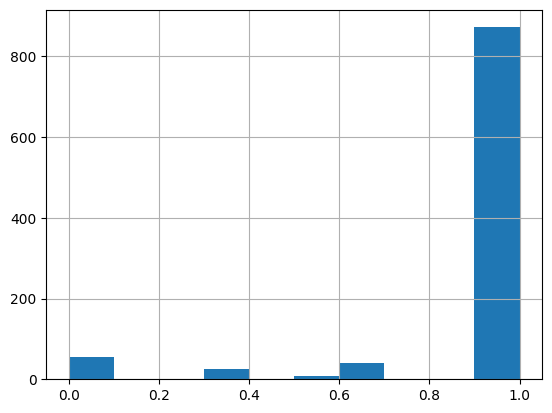

In [21]:
# scatter plot
df.context_adherence.hist()

In [22]:
print(len(df))
df = df[df.context_adherence > 0.8]
print(len(df))

1000
872


In [23]:
df.to_parquet("../data/syn_data_rag/filtered/data.parquet", index=False)